In [32]:
import numpy as np
from glob import glob
from astropy.io import fits, ascii
from astropy.wcs import WCS
from astropy.nddata.utils import Cutout2D
from astropy import units as u
from astropy.coordinates import SkyCoord
import astropy

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmasher as cms

from regions import EllipseSkyRegion, RectangleSkyRegion

from matplotlib import rc
rc('text', usetex=True)
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : '14'}
rc('font', **font)

from math import log10, floor
def round_sig(x, sig=2):
    return round(x, sig-int(floor(log10(abs(x))))-1)

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 fro

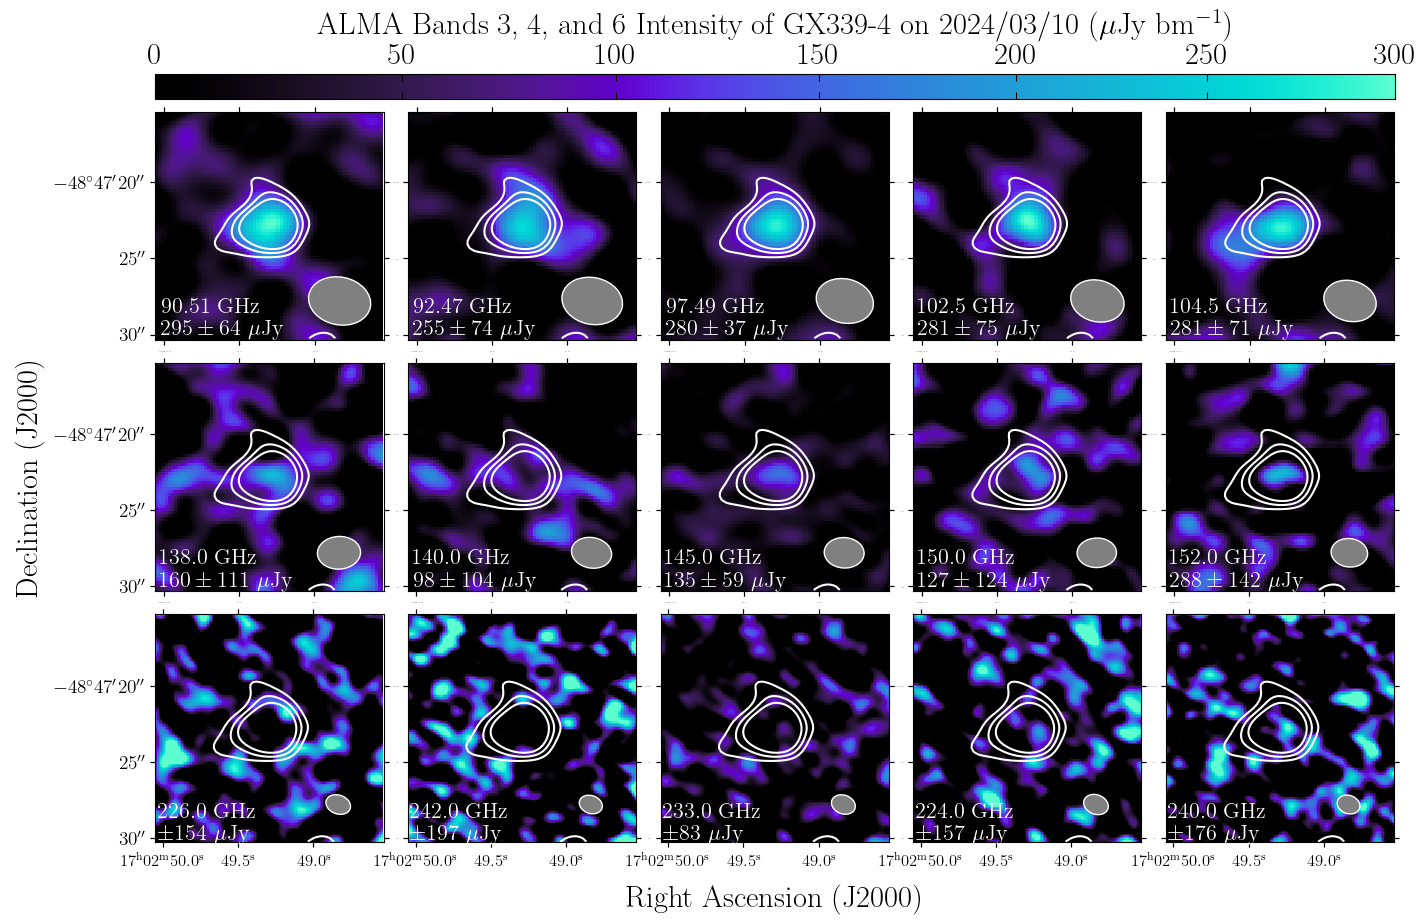

In [59]:
center = SkyCoord('17h02m49.29s', '-48:47:22.80deg', frame='icrs')
box_bkg = [15*u.arcsecond,15*u.arcsecond]
box_contour1 = [1.5*u.arcsecond,1.5*u.arcsecond]

bkg_im_746  =  fits.open('2023.A.00018/nice_images/X1c746_for_img_0704_no_self_cal.pbcor.fits')
bkg_data_746 = bkg_im_746[0].data[0][0]*1e6
bkg_wcs_746 = WCS(bkg_im_746[0].header, naxis=2)
bkg_cut_746 = Cutout2D(bkg_data_746,center, box_bkg, wcs=bkg_wcs_746)


def add_panel(fig, nrows, ncols, row, col, bkg_fname, flux_num):
    bkg_im  =  fits.open(bkg_fname)
    bkg_data = bkg_im[0].data[0][0]*1e6
    bkg_wcs = WCS(bkg_im[0].header, naxis=2)
    bkg_cut = Cutout2D(bkg_data,center, box_bkg, wcs=bkg_wcs)
    all_fluxes=['$295\pm 64$', '$255\pm 74$', '$280\pm 37$', '$281\pm 75$', '$281\pm 71$', 
                '$160\pm 111$', '$98\pm 104$', '$135\pm 59$', '$127\pm 124$', '$288\pm 142$', 
                '$\pm 154$', '$\pm 197$', '$\pm 83$', '$\pm 157$', '$\pm 176$']
        
        
    ax = plt.subplot2grid([nrows, ncols], [row, col], fig=fig, projection=bkg_cut.wcs)
    
    #coords = str(SkyCoord('17h02m49.2976050355s', '-48:47:22.8524239202deg', frame='icrs'))
    #coords = str(SkyCoord('17h02m49s', '-48:47:20deg', frame='icrs'))
    #a = coords.find('deg')+1
    #b = coords.find('(',a)+1
    #c = coords.find(',',b)
    #dotx = coords[b:c]
    #d = c + 1
    #while coords[d] == ' ':
    #    d = d + 1
    #e = coords.find(')',d)
    #doty = coords[d:e]
    #dotx=float(dotx)
    #doty=float(doty)
    
    #print(dotx)
    #print(doty)
    
    cmap = cms.cosmic
    cmap.set_bad('black')
    cmap_norm = colors.PowerNorm(0.9, vmin=0, vmax=300.0)
    
    ax_bkimg = ax.imshow(bkg_cut.data,
                         cmap = cmap,
                         norm = cmap_norm,
                         aspect = 'equal',
                         origin = 'lower', 
                         interpolation = 'none',
                         rasterized = True, transform=ax.get_transform(bkg_cut.wcs))
        
    meerkat_beam = EllipseSkyRegion(center.spherical_offsets_by(-4.5*u.arcsec,-5*u.arcsec),
                                    bkg_im[0].header['BMIN']*u.deg,bkg_im[0].header['BMAJ']*u.deg,(bkg_im[0].header['BPA'])*u.deg)
    meerkat_beam_pix_reg = meerkat_beam.to_pixel(bkg_cut.wcs)
    meerkat_beam_pix_reg.visual['color'] = 'w'
    meerkat_beam_pix_reg.visual['facecolor'] = '0.5'
    meerkat_beam_pix_reg.visual['fill'] = True
    meerkat_beam_pix_reg.visual['linewidth'] = 1.0
    meerkat_beam_pix_reg.plot(ax=ax)
    if row == 1 and col == 0:
        ax.set_ylabel(r"Declination (J2000)", size=22,labelpad=0.8)
    else:
        ax.set_ylabel(r" ", size=22)

    if row == 2 and col == 2:
        ax.set_xlabel(r"Right Ascension (J2000)", size=22,ha='center')
    else:
        ax.set_xlabel(r" ", size=6)
    axra = ax.coords[0]
    axdec = ax.coords[1]
    if row != 2:
        axra.set_ticklabel(size=0)
    if col != 0:
        axdec.set_ticklabel(size=0)
    if row == 2:
        axra.set_ticklabel(size=12, horizontalalignment='left')
    ax.text(1, 1, str(round_sig(bkg_im[0].header['CRVAL3']/1000000000,4))+' GHz'+'\n'+str(all_fluxes[flux_num])+' $\mu$Jy',fontsize=16,color='w')
    

    #if row == 0:
        #ax.contour(bkg_cut.data,bkg_cut.data, colors='w',levels=36.809*np.array([2,3,4]))
    #if row != 0:
        #ax.contour(bkg_cut_746.data,bkg_cut_746.data, transform=ax.get_transform(bkg_cut_746.wcs), colors='w',levels=36.809*np.array([2,3,4]))
        
    #Uncomment this one to put the full band 3 contour on every image.     
    ax.contour(bkg_cut_746.data,bkg_cut_746.data, transform=ax.get_transform(bkg_cut_746.wcs), colors='w',levels=36.809*np.array([2,3,4]))
    
    return fig, ax_bkimg
    
ext='2023.A.00018/nice_images/'
    
img_list = [ext+'X1c746_no_self_cal_spw0.pbcor.fits', ext+'X1c746_no_self_cal_spw1.pbcor.fits', ext+'X1c746_for_img_0704_no_self_cal.pbcor.fits', ext+'X1c746_no_self_cal_spw2.pbcor.fits', ext+'X1c746_no_self_cal_spw3.pbcor.fits', ext+'X1c7cc_0709_no_self_cal_spw0.pbcor.fits', ext+'X1c7cc_0709_no_self_cal_spw1.pbcor.fits', ext+'X1c7cc_0709_no_self_cal.pbcor.fits', ext+'X1c7cc_0709_no_self_cal_spw2.pbcor.fits', ext+'X1c7cc_0709_no_self_cal_spw3.pbcor.fits', ext+'X1c988_no_self_cal_0711_2_spw0.pbcor.fits', ext+'X1c988_no_self_cal_0711_2_spw1.pbcor.fits', ext+'X1c988_zero_iterations_0711_2.pbcor.fits', ext+'X1c988_no_self_cal_0711_2_spw2.pbcor.fits', ext+'X1c988_no_self_cal_0711_2_spw3.pbcor.fits']
fig = plt.figure(figsize=(16,16))
label_fsize = 26

for meer_n, meer_img in enumerate(img_list):
    _, ax_bkimg = add_panel(fig,5,5,int(meer_n/5),meer_n%5,meer_img,meer_n);
    
    
cbar = fig.colorbar(ax_bkimg, ax=fig.axes, orientation='horizontal', anchor=(0,8.8),aspect=50)
cbar.ax.set_title('ALMA Bands 3, 4, and 6 Intensity of GX339-4 on 2024/03/10 ($\mu$Jy bm$^{-1}$)',fontsize=label_fsize-4,ha='center')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(direction='in',length=5,bottom=True,top=True)
cbar.ax.xaxis.set_tick_params(labelsize=label_fsize-4)

fig.subplots_adjust(hspace=0.1,wspace=0.1)
#plt.savefig(fname='GX339_tiles_full_1_20240310.pdf', bbox_inches='tight')
plt.savefig(fname='GX339_tiles_full_2_20240310.pdf', bbox_inches='tight')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


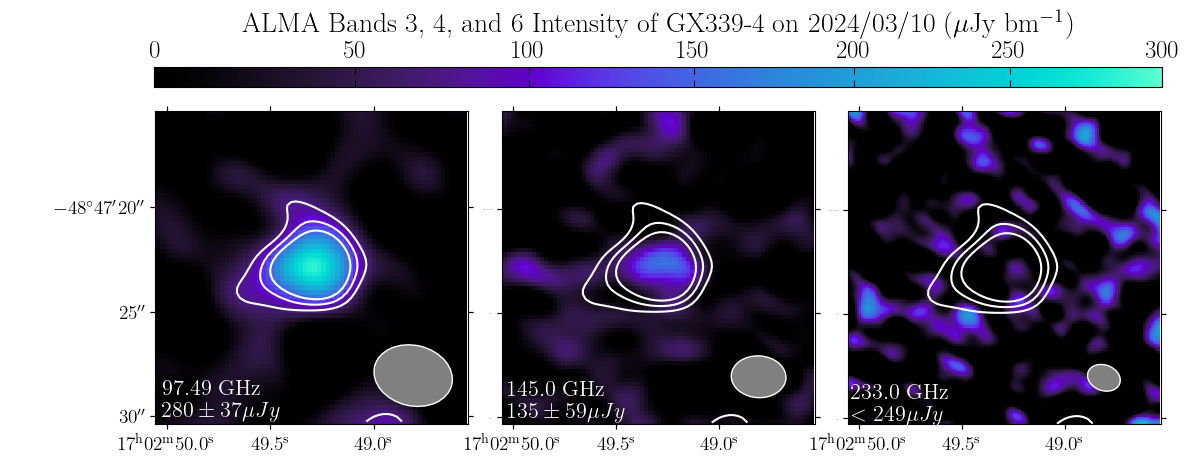

In [15]:
center = SkyCoord('17h02m49.29s', '-48:47:22.80deg', frame='icrs')
box_bkg = [15*u.arcsecond,15*u.arcsecond]
box_contour1 = [1.5*u.arcsecond,1.5*u.arcsecond]

bkg_im_746  =  fits.open('2023.A.00018/nice_images/X1c746_for_img_0704_no_self_cal.pbcor.fits')
bkg_data_746 = bkg_im_746[0].data[0][0]*1e6
bkg_wcs_746 = WCS(bkg_im_746[0].header, naxis=2)
bkg_cut_746 = Cutout2D(bkg_data_746,center, box_bkg, wcs=bkg_wcs_746)

def add_panel(fig, nrows, ncols, row, col, bkg_fname, flux_num):
    bkg_im  =  fits.open(bkg_fname)
    bkg_data = bkg_im[0].data[0][0]*1e6
    bkg_wcs = WCS(bkg_im[0].header, naxis=2)
    bkg_cut = Cutout2D(bkg_data,center, box_bkg, wcs=bkg_wcs)
    all_fluxes=['\n $280\pm 37 \mu Jy$', '\n $135\pm 59 \mu Jy$', '\n $<249 \mu Jy$']
        
    ax = plt.subplot2grid([nrows, ncols], [row, col], fig=fig, projection=bkg_cut.wcs)
    
    coords = str(SkyCoord('17h02m49.2927772284s', '-48:47:22.8424633208deg', frame='icrs'))
    a = coords.find('deg')+1
    b = coords.find('(',a)+1
    c = coords.find(',',b)
    dotx = coords[b:c]
    d = c + 1
    while coords[d] == ' ':
        d = d + 1
    e = coords.find(')',d)
    doty = coords[d:e]
    dotx=float(dotx)
    doty=float(doty)
    
    cmap = cms.cosmic
    cmap.set_bad('black')
    cmap_norm = colors.PowerNorm(0.9, vmin=0, vmax=300.0)
    
    ax_bkimg = ax.imshow(bkg_cut.data,
                         cmap = cmap,
                         norm = cmap_norm,
                         aspect = 'equal',
                         origin = 'lower', 
                         interpolation = 'none',
                         rasterized = True, transform=ax.get_transform(bkg_cut.wcs))
        
    meerkat_beam = EllipseSkyRegion(center.spherical_offsets_by(-4.75*u.arcsec,-5.25*u.arcsec),
                                    bkg_im[0].header['BMIN']*u.deg,bkg_im[0].header['BMAJ']*u.deg,(bkg_im[0].header['BPA'])*u.deg)
    meerkat_beam_pix_reg = meerkat_beam.to_pixel(bkg_cut.wcs)
    meerkat_beam_pix_reg.visual['color'] = 'w'
    meerkat_beam_pix_reg.visual['facecolor'] = '0.5'
    meerkat_beam_pix_reg.visual['fill'] = True
    meerkat_beam_pix_reg.visual['linewidth'] = 1.0
    meerkat_beam_pix_reg.plot(ax=ax)
    if row == 1 and col == 0:
        ax.set_ylabel(r"Declination (J2000)", size=22,labelpad=0.8)
    else:
        ax.set_ylabel(r" ", size=22)

    if row == 1 and col == 2:
        ax.set_xlabel(r"Right Ascension (J2000)", size=22,ha='center')
    else:
        ax.set_xlabel(r" ", size=6)
    axra = ax.coords[0]
    axdec = ax.coords[1]
    if row != 0:
        axra.set_ticklabel(size=0)
    if col != 0:
        axdec.set_ticklabel(size=0)
    if row == 2:
        axra.set_ticklabel(size=12, horizontalalignment='left')
    ax.text(1, 1, str(round_sig(bkg_im[0].header['CRVAL3']/1000000000,4))+' GHz'+str(all_fluxes[flux_num]),fontsize=16,color='w')
        
    #Uncomment this one to put the full band 3 contour on every image.     
    ax.contour(bkg_cut_746.data,bkg_cut_746.data, transform=ax.get_transform(bkg_cut_746.wcs), colors='w', levels=36.809*np.array([2,3,4]), zorder=10)
    
    #Uncomment this one to put the emission center on every image. 
    #ax.scatter(dotx, doty, transform=ax.get_transform('icrs'), zorder=10, marker='x',color='r', s=80)
    
    return fig, ax_bkimg
    

img_list = ['2023.A.00018/nice_images/X1c746_for_img_0704_no_self_cal.pbcor.fits', '2023.A.00018/nice_images/X1c7cc_0709_no_self_cal.pbcor.fits', '2023.A.00018/nice_images/X1c988_zero_iterations_0711_2.pbcor.fits']
fig = plt.figure(figsize=(13,13))
label_fsize = 26

for meer_n, meer_img in enumerate(img_list):
    _, ax_bkimg = add_panel(fig,3,3,int(meer_n/3),meer_n%3,meer_img,meer_n);
    
cbar = fig.colorbar(ax_bkimg, ax=fig.axes, orientation='horizontal', anchor=(0,13.25),aspect=50)
cbar.ax.set_title('ALMA Bands 3, 4, and 6 Intensity of GX339-4 on 2024/03/10 ($\mu$Jy bm$^{-1}$)',fontsize=20,ha='center')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(direction='in',length=5,bottom=True,top=True)
cbar.ax.xaxis.set_tick_params(labelsize=18)

fig.subplots_adjust(hspace=0.1,wspace=0.1)
plt.savefig(fname='GX339_tiles_whole_band_20240310_contour.pdf', bbox_inches='tight')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


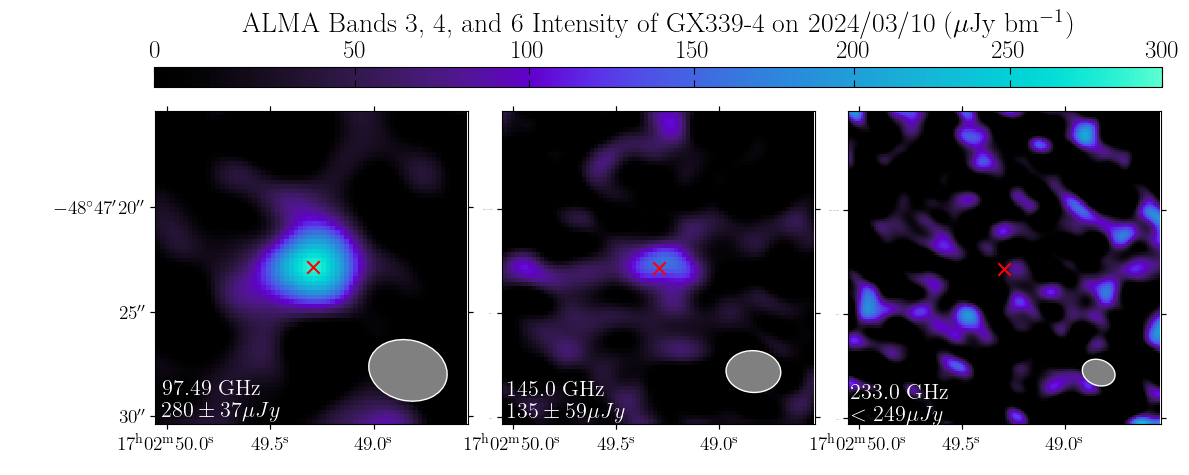

In [16]:
center = SkyCoord('17h02m49.29s', '-48:47:22.80deg', frame='icrs')
box_bkg = [15*u.arcsecond,15*u.arcsecond]
box_contour1 = [1.5*u.arcsecond,1.5*u.arcsecond]

bkg_im_746  =  fits.open('2023.A.00018/nice_images/X1c746_for_img_0704_no_self_cal.pbcor.fits')
bkg_data_746 = bkg_im_746[0].data[0][0]*1e6
bkg_wcs_746 = WCS(bkg_im_746[0].header, naxis=2)
bkg_cut_746 = Cutout2D(bkg_data_746,center, box_bkg, wcs=bkg_wcs_746)

def add_panel(fig, nrows, ncols, row, col, bkg_fname, flux_num):
    bkg_im  =  fits.open(bkg_fname)
    bkg_data = bkg_im[0].data[0][0]*1e6
    bkg_wcs = WCS(bkg_im[0].header, naxis=2)
    bkg_cut = Cutout2D(bkg_data,center, box_bkg, wcs=bkg_wcs)
    all_fluxes=['\n $280\pm 37 \mu Jy$', '\n $135\pm 59 \mu Jy$', '\n $<249 \mu Jy$']
        
    ax = plt.subplot2grid([nrows, ncols], [row, col], fig=fig, projection=bkg_cut.wcs)
    
    coords = str(SkyCoord('17h02m49.2927772284s', '-48:47:22.8424633208deg', frame='icrs'))
    a = coords.find('deg')+1
    b = coords.find('(',a)+1
    c = coords.find(',',b)
    dotx = coords[b:c]
    d = c + 1
    while coords[d] == ' ':
        d = d + 1
    e = coords.find(')',d)
    doty = coords[d:e]
    dotx=float(dotx)
    doty=float(doty)
    
    cmap = cms.cosmic
    cmap.set_bad('black')
    cmap_norm = colors.PowerNorm(0.9, vmin=0, vmax=300.0)
    
    ax_bkimg = ax.imshow(bkg_cut.data,
                         cmap = cmap,
                         norm = cmap_norm,
                         aspect = 'equal',
                         origin = 'lower', 
                         interpolation = 'none',
                         rasterized = True, transform=ax.get_transform(bkg_cut.wcs))
        
    meerkat_beam = EllipseSkyRegion(center.spherical_offsets_by(-4.5*u.arcsec,-5*u.arcsec),
                                    bkg_im[0].header['BMIN']*u.deg,bkg_im[0].header['BMAJ']*u.deg,(bkg_im[0].header['BPA'])*u.deg)
    meerkat_beam_pix_reg = meerkat_beam.to_pixel(bkg_cut.wcs)
    meerkat_beam_pix_reg.visual['color'] = 'w'
    meerkat_beam_pix_reg.visual['facecolor'] = '0.5'
    meerkat_beam_pix_reg.visual['fill'] = True
    meerkat_beam_pix_reg.visual['linewidth'] = 1.0
    meerkat_beam_pix_reg.plot(ax=ax)
    if row == 1 and col == 0:
        ax.set_ylabel(r"Declination (J2000)", size=22,labelpad=0.8)
    else:
        ax.set_ylabel(r" ", size=22)

    if row == 1 and col == 2:
        ax.set_xlabel(r"Right Ascension (J2000)", size=22,ha='center')
    else:
        ax.set_xlabel(r" ", size=6)
    axra = ax.coords[0]
    axdec = ax.coords[1]
    if row != 0:
        axra.set_ticklabel(size=0)
    if col != 0:
        axdec.set_ticklabel(size=0)
    if row == 2:
        axra.set_ticklabel(size=12, horizontalalignment='left')
    ax.text(1, 1, str(round_sig(bkg_im[0].header['CRVAL3']/1000000000,4))+' GHz'+str(all_fluxes[flux_num]),fontsize=16,color='w')
        
    #Uncomment this one to put the full band 3 contour on every image.     
    #ax.contour(bkg_cut_746.data,bkg_cut_746.data, transform=ax.get_transform(bkg_cut_746.wcs), colors='w', levels=36.809*np.array([2,3,4]), zorder=10)
    
    #Uncomment this one to put the emission center on every image. 
    ax.scatter(dotx, doty, transform=ax.get_transform('icrs'), zorder=10, marker='x',color='r', s=80)
    
    return fig, ax_bkimg
    

img_list = ['2023.A.00018/nice_images/X1c746_for_img_0704_no_self_cal.pbcor.fits', '2023.A.00018/nice_images/X1c7cc_0709_no_self_cal.pbcor.fits', '2023.A.00018/nice_images/X1c988_zero_iterations_0711_2.pbcor.fits']
fig = plt.figure(figsize=(13,13))
label_fsize = 26

for meer_n, meer_img in enumerate(img_list):
    _, ax_bkimg = add_panel(fig,3,3,int(meer_n/3),meer_n%3,meer_img,meer_n);
    
cbar = fig.colorbar(ax_bkimg, ax=fig.axes, orientation='horizontal', anchor=(0,13.25),aspect=50)
cbar.ax.set_title('ALMA Bands 3, 4, and 6 Intensity of GX339-4 on 2024/03/10 ($\mu$Jy bm$^{-1}$)',fontsize=20,ha='center')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(direction='in',length=5,bottom=True,top=True)
cbar.ax.xaxis.set_tick_params(labelsize=18)

fig.subplots_adjust(hspace=0.1,wspace=0.1)
plt.savefig(fname='GX339_tiles_whole_band_20240310_marker.pdf', bbox_inches='tight')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 fro

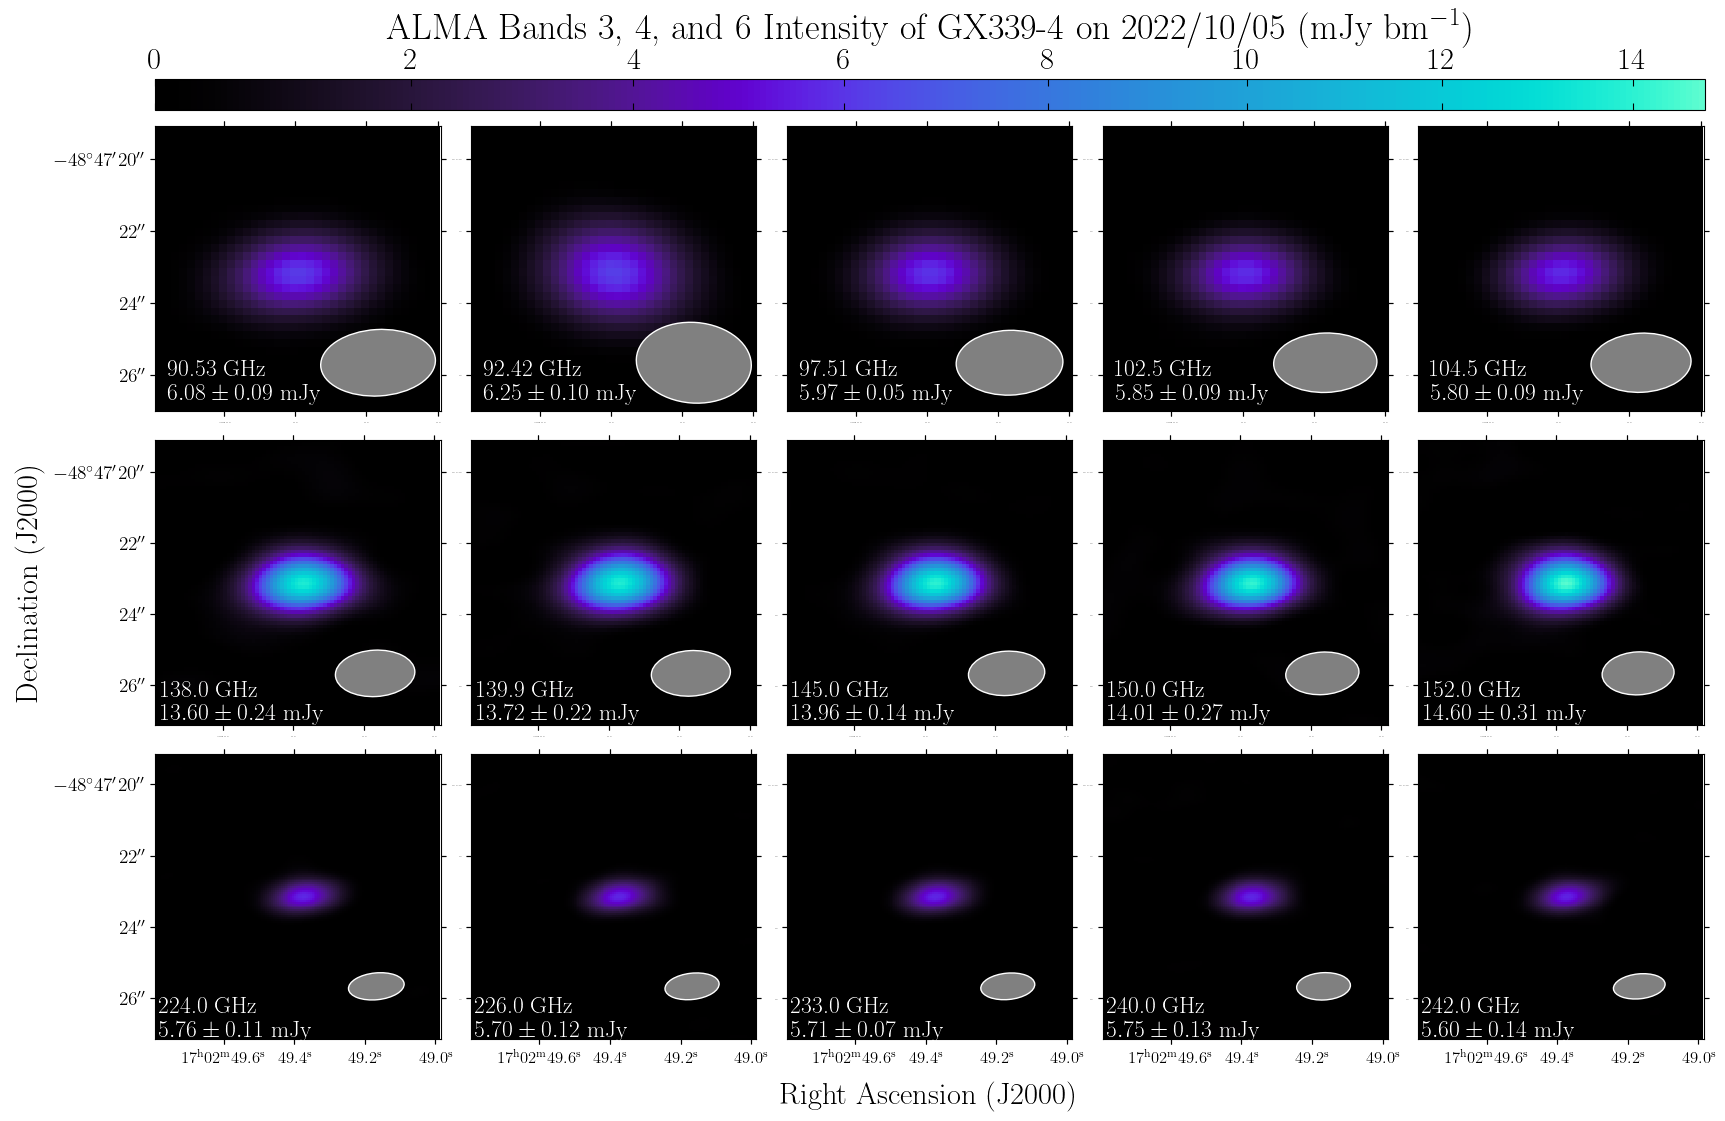

In [46]:
def add_panel(fig, nrows, ncols, row, col, bkg_fname, flux_num):
    bkg_im  =  fits.open(bkg_fname)
    bkg_data = bkg_im[0].data[0][0]*1e3
    bkg_wcs = WCS(bkg_im[0].header, naxis=2)
    bkg_cut = Cutout2D(bkg_data,center, box_bkg, wcs=bkg_wcs)
    all_fluxes=['$6.08\pm 0.09$', '$6.25\pm 0.10$', '$5.97\pm 0.05$', '$5.85\pm 0.09$', '$5.80\pm 0.09$',
                '$13.60\pm 0.24$', '$13.72\pm 0.22$', '$13.96\pm 0.14$', '$14.01\pm 0.27$', '$14.60\pm 0.31$',
                '$5.76\pm 0.11$', '$5.70\pm 0.12$', '$5.71\pm 0.07$', '$5.75\pm 0.13$', '$5.60\pm 0.14$']
        
        
    ax = plt.subplot2grid([nrows, ncols], [row, col], fig=fig, projection=bkg_cut.wcs)
    
    cmap = cms.cosmic
    cmap.set_bad('black')
    cmap_norm = colors.PowerNorm(0.9, vmin=0, vmax=14.75)
    
    ax_bkimg = ax.imshow(bkg_cut.data,
                         cmap = cmap,
                         norm = cmap_norm,
                         aspect = 'equal',
                         origin = 'lower', 
                         interpolation = 'none',
                         rasterized = True, transform=ax.get_transform(bkg_cut.wcs))
        
    meerkat_beam = EllipseSkyRegion(center.spherical_offsets_by(-2.2*u.arcsec,-2.5*u.arcsec),
                                    bkg_im[0].header['BMIN']*u.deg,bkg_im[0].header['BMAJ']*u.deg,(bkg_im[0].header['BPA'])*u.deg)
    meerkat_beam_pix_reg = meerkat_beam.to_pixel(bkg_cut.wcs)
    meerkat_beam_pix_reg.visual['color'] = 'w'
    meerkat_beam_pix_reg.visual['facecolor'] = '0.5'
    meerkat_beam_pix_reg.visual['fill'] = True
    meerkat_beam_pix_reg.visual['linewidth'] = 1.0
    meerkat_beam_pix_reg.plot(ax=ax)
    if row == 1 and col == 0:
        ax.set_ylabel(r"Declination (J2000)", size=22,labelpad=0.8)
    else:
        ax.set_ylabel(r" ", size=22)

    if row == 2 and col == 2:
        ax.set_xlabel(r"Right Ascension (J2000)", size=22,ha='center')
    else:
        ax.set_xlabel(r" ", size=6)
    axra = ax.coords[0]
    axdec = ax.coords[1]
    if row != 2:
        axra.set_ticklabel(size=0)
    if col != 0:
        axdec.set_ticklabel(size=0)
    if row == 2:
        axra.set_ticklabel(size=12, horizontalalignment='left')
    ax.text(1, 1, str(round_sig(bkg_im[0].header['CRVAL3']/1000000000,4))+' GHz'+'\n'+str(all_fluxes[flux_num])+' mJy',fontsize=17,color='w')
    
    return fig, ax_bkimg
    

img_list = ['2022.1.01182.T/nice_images/X8b6f_no_self_cal_spw0.pbcor.fits','2022.1.01182.T/nice_images/X8b6f_no_self_cal_spw1.pbcor.fits','2022.1.01182.T/nice_images/X8b6f_no_self_cal.pbcor.fits','2022.1.01182.T/nice_images/X8b6f_no_self_cal_spw2.pbcor.fits','2022.1.01182.T/nice_images/X8b6f_no_self_cal_spw3.pbcor.fits', '2022.1.01182.T/nice_images/X8ce1_no_self_cal_spw0.pbcor.fits','2022.1.01182.T/nice_images/X8ce1_no_self_cal_spw1.pbcor.fits', '2022.1.01182.T/nice_images/X8ce1_no_self_cal.pbcor.fits', '2022.1.01182.T/nice_images/X8ce1_no_self_cal_spw2.pbcor.fits', '2022.1.01182.T/nice_images/X8ce1_no_self_cal_spw3.pbcor.fits','2022.1.01182.T/nice_images/X8e73_no_self_cal_spw0.pbcor.fits', '2022.1.01182.T/nice_images/X8e73_no_self_cal_spw1.pbcor.fits', '2022.1.01182.T/nice_images/X8e73_no_self_cal.pbcor.fits', '2022.1.01182.T/nice_images/X8e73_no_self_cal_spw2.pbcor.fits', '2022.1.01182.T/nice_images/X8e73_no_self_cal_spw3.pbcor.fits']
fig = plt.figure(figsize=(20,20))
label_fsize = 26


center = SkyCoord('17h02m49.39s', '-48:47:23.16deg', frame='icrs')
box_bkg = [8*u.arcsecond,8*u.arcsecond]
box_contour1 = [1.5*u.arcsecond,1.5*u.arcsecond]

for meer_n, meer_img in enumerate(img_list):
    _, ax_bkimg = add_panel(fig,5,5,int(meer_n/5),meer_n%5,meer_img,meer_n);
    
    
cbar = fig.colorbar(ax_bkimg, ax=fig.axes, orientation='horizontal', anchor=(0,8.8),aspect=50)
cbar.ax.set_title('ALMA Bands 3, 4, and 6 Intensity of GX339-4 on 2022/10/05 (mJy bm$^{-1}$)',fontsize=label_fsize,ha='center')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(direction='in',length=5,bottom=True,top=True)
cbar.ax.xaxis.set_tick_params(labelsize=label_fsize-4)

fig.subplots_adjust(hspace=0.1,wspace=0.1)
plt.savefig(fname='GX339_tiles_full_20221005.pdf', bbox_inches='tight')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 fro

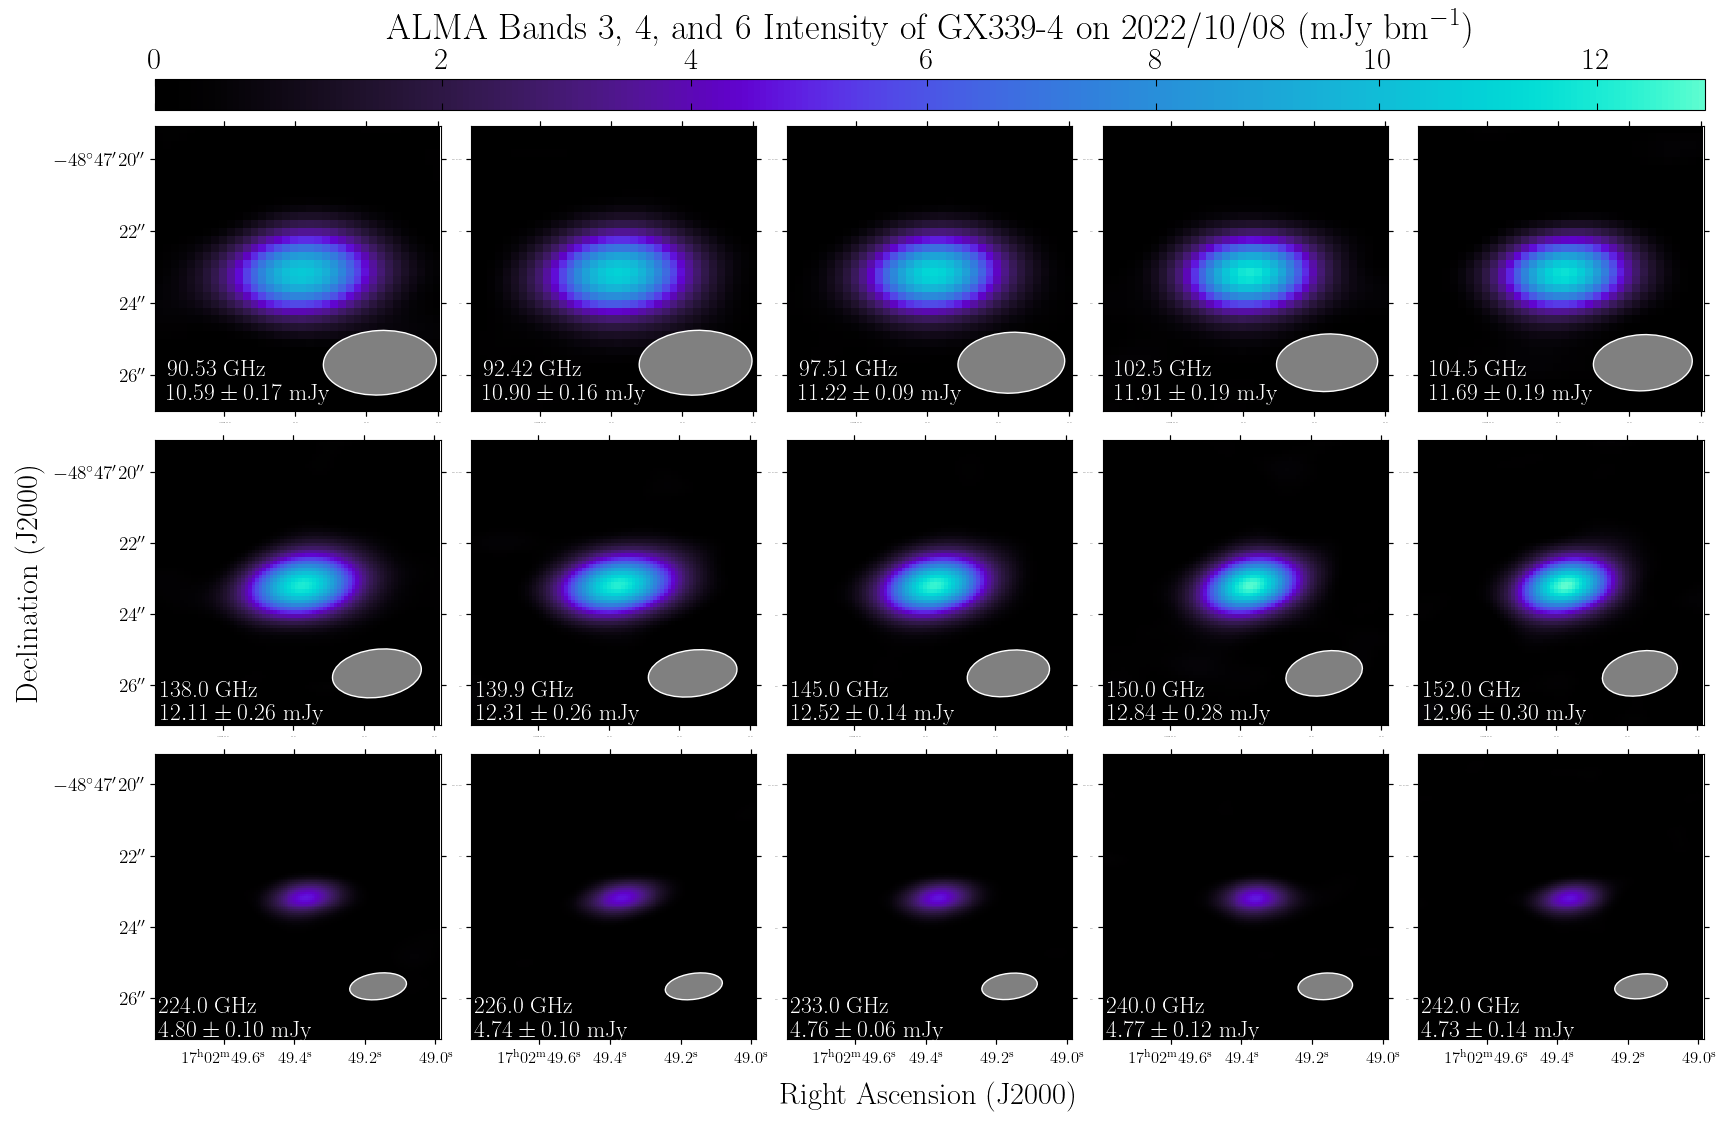

In [45]:
def add_panel(fig, nrows, ncols, row, col, bkg_fname, flux_num):
    bkg_im  =  fits.open(bkg_fname)
    bkg_data = bkg_im[0].data[0][0]*1e3
    bkg_wcs = WCS(bkg_im[0].header, naxis=2)
    bkg_cut = Cutout2D(bkg_data,center, box_bkg, wcs=bkg_wcs)
    all_fluxes=['$10.59\pm 0.17$', '$10.90\pm 0.16$', '$11.22\pm 0.09$', '$11.91\pm 0.19$', '$11.69\pm 0.19$',
                '$12.11\pm 0.26$', '$12.31\pm 0.26$', '$12.52\pm 0.14$', '$12.84\pm 0.28$', '$12.96\pm 0.30$',
                '$4.80\pm 0.10$', '$4.74\pm 0.10$', '$4.76\pm 0.06$', '$4.77\pm 0.12$', '$4.73\pm 0.14$']
        
        
    ax = plt.subplot2grid([nrows, ncols], [row, col], fig=fig, projection=bkg_cut.wcs)
    
    cmap = cms.cosmic
    cmap.set_bad('black')
    cmap_norm = colors.PowerNorm(0.9, vmin=0, vmax=13.0)
    
    ax_bkimg = ax.imshow(bkg_cut.data,
                         cmap = cmap,
                         norm = cmap_norm,
                         aspect = 'equal',
                         origin = 'lower', 
                         interpolation = 'none',
                         rasterized = True, transform=ax.get_transform(bkg_cut.wcs))
        
    meerkat_beam = EllipseSkyRegion(center.spherical_offsets_by(-2.25*u.arcsec,-2.5*u.arcsec),
                                    bkg_im[0].header['BMIN']*u.deg,bkg_im[0].header['BMAJ']*u.deg,(bkg_im[0].header['BPA'])*u.deg)
    meerkat_beam_pix_reg = meerkat_beam.to_pixel(bkg_cut.wcs)
    meerkat_beam_pix_reg.visual['color'] = 'w'
    meerkat_beam_pix_reg.visual['facecolor'] = '0.5'
    meerkat_beam_pix_reg.visual['fill'] = True
    meerkat_beam_pix_reg.visual['linewidth'] = 1.0
    meerkat_beam_pix_reg.plot(ax=ax)
    if row == 1 and col == 0:
        ax.set_ylabel(r"Declination (J2000)", size=22,labelpad=0.8)
    else:
        ax.set_ylabel(r" ", size=22)

    if row == 2 and col == 2:
        ax.set_xlabel(r"Right Ascension (J2000)", size=22,ha='center')
    else:
        ax.set_xlabel(r" ", size=6)
    axra = ax.coords[0]
    axdec = ax.coords[1]
    if row != 2:
        axra.set_ticklabel(size=0)
    if col != 0:
        axdec.set_ticklabel(size=0)
    if row == 2:
        axra.set_ticklabel(size=12, horizontalalignment='left')
    ax.text(1, 1, str(round_sig(bkg_im[0].header['CRVAL3']/1000000000,4))+' GHz'+'\n'+str(all_fluxes[flux_num])+' mJy',fontsize=17,color='w')
    
    return fig, ax_bkimg
    

img_list = ['2022.1.01182.T/nice_images/X11508_no_self_cal_spw0.pbcor.fits','2022.1.01182.T/nice_images/X11508_no_self_cal_spw1.pbcor.fits','2022.1.01182.T/nice_images/X11508_no_self_cal.pbcor.fits','2022.1.01182.T/nice_images/X11508_no_self_cal_spw2.pbcor.fits','2022.1.01182.T/nice_images/X11508_no_self_cal_spw3.pbcor.fits', '2022.1.01182.T/nice_images/X1166c_no_self_cal_spw0.pbcor.fits', '2022.1.01182.T/nice_images/X1166c_no_self_cal_spw1.pbcor.fits', '2022.1.01182.T/nice_images/X1166c_no_self_cal.pbcor.fits', '2022.1.01182.T/nice_images/X1166c_no_self_cal_spw2.pbcor.fits', '2022.1.01182.T/nice_images/X1166c_no_self_cal_spw3.pbcor.fits', '2022.1.01182.T/nice_images/X117f2_no_self_cal_spw0.pbcor.fits', '2022.1.01182.T/nice_images/X117f2_no_self_cal_spw1.pbcor.fits', '2022.1.01182.T/nice_images/X117f2_no_self_cal.pbcor.fits', '2022.1.01182.T/nice_images/X117f2_no_self_cal_spw2.pbcor.fits', '2022.1.01182.T/nice_images/X117f2_no_self_cal_spw3.pbcor.fits']
fig = plt.figure(figsize=(20,20))
label_fsize = 26


center = SkyCoord('17h02m49.39s', '-48:47:23.16deg', frame='icrs')
box_bkg = [8*u.arcsecond,8*u.arcsecond]
box_contour1 = [1.5*u.arcsecond,1.5*u.arcsecond]

for meer_n, meer_img in enumerate(img_list):
    _, ax_bkimg = add_panel(fig,5,5,int(meer_n/5),meer_n%5,meer_img,meer_n);
    
    
cbar = fig.colorbar(ax_bkimg, ax=fig.axes, orientation='horizontal', anchor=(0,8.8),aspect=50)
cbar.ax.set_title('ALMA Bands 3, 4, and 6 Intensity of GX339-4 on 2022/10/08 (mJy bm$^{-1}$)',fontsize=label_fsize,ha='center')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(direction='in',length=5,bottom=True,top=True)
cbar.ax.xaxis.set_tick_params(labelsize=label_fsize-4)

fig.subplots_adjust(hspace=0.1,wspace=0.1)
plt.savefig(fname='GX339_tiles_full_20221008.pdf', bbox_inches='tight')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


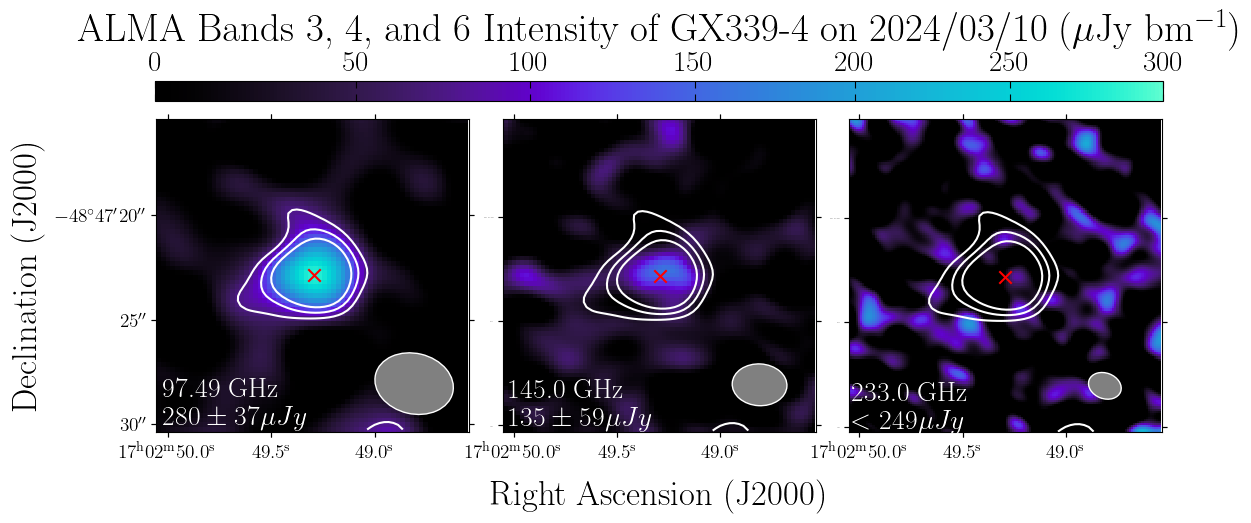

In [52]:
center = SkyCoord('17h02m49.29s', '-48:47:22.80deg', frame='icrs')
box_bkg = [15*u.arcsecond,15*u.arcsecond]
box_contour1 = [1.5*u.arcsecond,1.5*u.arcsecond]

bkg_im_746  =  fits.open('2023.A.00018/nice_images/X1c746_for_img_0704_no_self_cal.pbcor.fits')
bkg_data_746 = bkg_im_746[0].data[0][0]*1e6
bkg_wcs_746 = WCS(bkg_im_746[0].header, naxis=2)
bkg_cut_746 = Cutout2D(bkg_data_746,center, box_bkg, wcs=bkg_wcs_746)

def add_panel(fig, nrows, ncols, row, col, bkg_fname, flux_num):
    bkg_im  =  fits.open(bkg_fname)
    bkg_data = bkg_im[0].data[0][0]*1e6
    bkg_wcs = WCS(bkg_im[0].header, naxis=2)
    bkg_cut = Cutout2D(bkg_data,center, box_bkg, wcs=bkg_wcs)
    all_fluxes=['\n $280\pm 37 \mu Jy$', '\n $135\pm 59 \mu Jy$', '\n $<249 \mu Jy$']
        
    ax = plt.subplot2grid([nrows, ncols], [row, col], fig=fig, projection=bkg_cut.wcs)
    
    coords = str(SkyCoord('17h02m49.2927772284s', '-48:47:22.8424633208deg', frame='icrs'))
    a = coords.find('deg')+1
    b = coords.find('(',a)+1
    c = coords.find(',',b)
    dotx = coords[b:c]
    d = c + 1
    while coords[d] == ' ':
        d = d + 1
    e = coords.find(')',d)
    doty = coords[d:e]
    dotx=float(dotx)
    doty=float(doty)
    
    cmap = cms.cosmic
    cmap.set_bad('black')
    cmap_norm = colors.PowerNorm(0.9, vmin=0, vmax=300.0)
    
    ax_bkimg = ax.imshow(bkg_cut.data,
                         cmap = cmap,
                         norm = cmap_norm,
                         aspect = 'equal',
                         origin = 'lower', 
                         interpolation = 'none',
                         rasterized = True, transform=ax.get_transform(bkg_cut.wcs))
        
    meerkat_beam = EllipseSkyRegion(center.spherical_offsets_by(-4.75*u.arcsec,-5.25*u.arcsec),
                                    bkg_im[0].header['BMIN']*u.deg,bkg_im[0].header['BMAJ']*u.deg,(bkg_im[0].header['BPA'])*u.deg)
    meerkat_beam_pix_reg = meerkat_beam.to_pixel(bkg_cut.wcs)
    meerkat_beam_pix_reg.visual['color'] = 'w'
    meerkat_beam_pix_reg.visual['facecolor'] = '0.5'
    meerkat_beam_pix_reg.visual['fill'] = True
    meerkat_beam_pix_reg.visual['linewidth'] = 1.0
    meerkat_beam_pix_reg.plot(ax=ax)
    if row == 0 and col == 0:
        ax.set_ylabel(r"Declination (J2000)", size=25,labelpad=0.8)
    else:
        ax.set_ylabel(r" ", size=22)

    if row == 0 and col == 1:
        ax.set_xlabel(r"Right Ascension (J2000)", size=25,ha='center')
    else:
        ax.set_xlabel(r" ", size=6)
    axra = ax.coords[0]
    axdec = ax.coords[1]
    if row != 0:
        axra.set_ticklabel(size=0)
    if col != 0:
        axdec.set_ticklabel(size=0)
    if row == 0:
        axra.set_ticklabel(size=14, horizontalalignment='left')
    if col == 0:
        axdec.set_ticklabel(size=14, horizontalalignment='left')
    ax.text(1, 1, str(round_sig(bkg_im[0].header['CRVAL3']/1000000000,4))+' GHz'+str(all_fluxes[flux_num]),fontsize=20,color='w')
        
    #Uncomment this one to put the full band 3 contour on every image.     
    ax.contour(bkg_cut_746.data,bkg_cut_746.data, transform=ax.get_transform(bkg_cut_746.wcs), colors='w', levels=36.809*np.array([2,3,4]), zorder=10)
    
    #Uncomment this one to put the emission center on every image. 
    ax.scatter(dotx, doty, transform=ax.get_transform('icrs'), zorder=10, marker='x',color='r', s=80)
    
    return fig, ax_bkimg
    

img_list = ['2023.A.00018/nice_images/X1c746_for_img_0704_no_self_cal.pbcor.fits', '2023.A.00018/nice_images/X1c7cc_0709_no_self_cal.pbcor.fits', '2023.A.00018/nice_images/X1c988_zero_iterations_0711_2.pbcor.fits']
fig = plt.figure(figsize=(13,13))
label_fsize = 26

for meer_n, meer_img in enumerate(img_list):
    _, ax_bkimg = add_panel(fig,3,3,int(meer_n/3),meer_n%3,meer_img,meer_n);
    
cbar = fig.colorbar(ax_bkimg, ax=fig.axes, orientation='horizontal', anchor=(0,13),aspect=50)
cbar.ax.set_title('ALMA Bands 3, 4, and 6 Intensity of GX339-4 on 2024/03/10 ($\mu$Jy bm$^{-1}$)',fontsize=28,ha='center')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(direction='in',length=5,bottom=True,top=True)
cbar.ax.xaxis.set_tick_params(labelsize=21)

fig.subplots_adjust(hspace=0.1,wspace=0.1)
plt.savefig(fname='GX339_tiles_whole_band_20240310_contour_marker.pdf', bbox_inches='tight')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


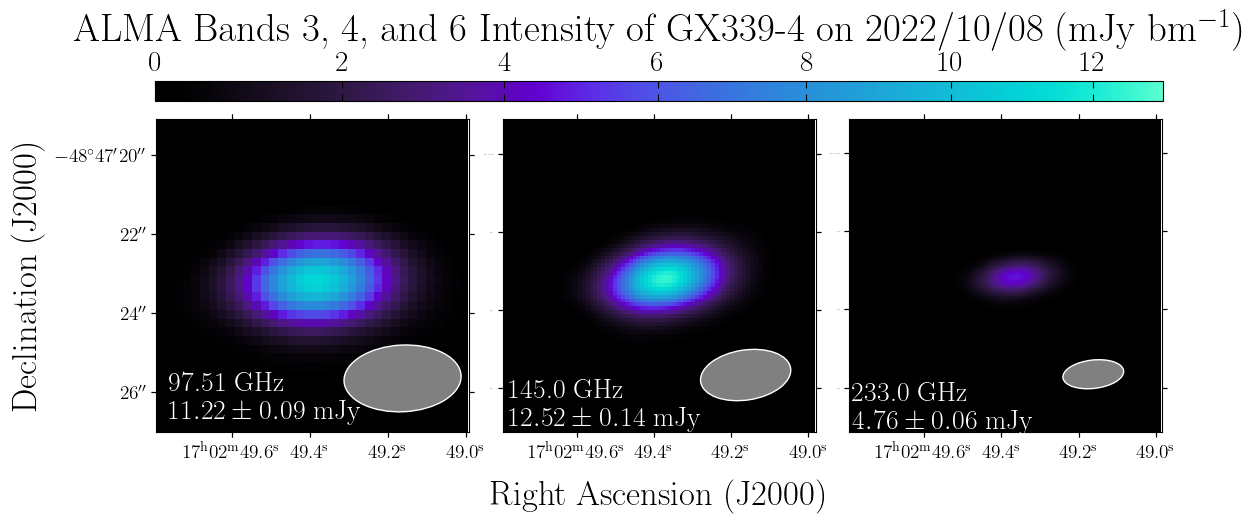

In [50]:
center = SkyCoord('17h02m49.39s', '-48:47:23.16deg', frame='icrs')
box_bkg = [8*u.arcsecond,8*u.arcsecond]
box_contour1 = [1.5*u.arcsecond,1.5*u.arcsecond]

def add_panel(fig, nrows, ncols, row, col, bkg_fname, flux_num):
    bkg_im  =  fits.open(bkg_fname)
    bkg_data = bkg_im[0].data[0][0]*1e3
    bkg_wcs = WCS(bkg_im[0].header, naxis=2)
    bkg_cut = Cutout2D(bkg_data,center, box_bkg, wcs=bkg_wcs)
    all_fluxes=['$11.22\pm 0.09$', '$12.52\pm 0.14$','$4.76\pm 0.06$']

    cmap = cms.cosmic
    cmap.set_bad('black')
    cmap_norm = colors.PowerNorm(0.9, vmin=0, vmax=13.0)
    
    ax = plt.subplot2grid([nrows, ncols], [row, col], fig=fig, projection=bkg_cut.wcs)
    
    ax_bkimg = ax.imshow(bkg_cut.data,
                         cmap = cmap,
                         norm = cmap_norm,
                         aspect = 'equal',
                         origin = 'lower', 
                         interpolation = 'none',
                         rasterized = True, transform=ax.get_transform(bkg_cut.wcs))
        
    meerkat_beam = EllipseSkyRegion(center.spherical_offsets_by(-2.25*u.arcsec,-2.5*u.arcsec),
                                    bkg_im[0].header['BMIN']*u.deg,bkg_im[0].header['BMAJ']*u.deg,(bkg_im[0].header['BPA'])*u.deg)
    meerkat_beam_pix_reg = meerkat_beam.to_pixel(bkg_cut.wcs)
    meerkat_beam_pix_reg.visual['color'] = 'w'
    meerkat_beam_pix_reg.visual['facecolor'] = '0.5'
    meerkat_beam_pix_reg.visual['fill'] = True
    meerkat_beam_pix_reg.visual['linewidth'] = 1.0
    meerkat_beam_pix_reg.plot(ax=ax)
    if row == 0 and col == 0:
        ax.set_ylabel(r"Declination (J2000)", size=25,labelpad=0.8)
    else:
        ax.set_ylabel(r" ", size=22)

    if row == 0 and col == 1:
        ax.set_xlabel(r"Right Ascension (J2000)", size=25,ha='center')
    else:
        ax.set_xlabel(r" ", size=6)
    axra = ax.coords[0]
    axdec = ax.coords[1]
    if row != 0:
        axra.set_ticklabel(size=0)
    if col != 0:
        axdec.set_ticklabel(size=0)
    if row == 0:
        axra.set_ticklabel(size=14, horizontalalignment='left')
    if col == 0:
        axdec.set_ticklabel(size=14, horizontalalignment='left')
    ax.text(1, 1, str(round_sig(bkg_im[0].header['CRVAL3']/1000000000,4))+' GHz'+'\n'+str(all_fluxes[flux_num])+' mJy',fontsize=20,color='w')

    
    return fig, ax_bkimg
    

img_list = ['2022.1.01182.T/nice_images/X11508_no_self_cal.pbcor.fits', '2022.1.01182.T/nice_images/X1166c_no_self_cal.pbcor.fits', '2022.1.01182.T/nice_images/X117f2_no_self_cal.pbcor.fits']
fig = plt.figure(figsize=(13,13))
label_fsize = 26

for meer_n, meer_img in enumerate(img_list):
    _, ax_bkimg = add_panel(fig,3,3,int(meer_n/3),meer_n%3,meer_img,meer_n);
    
cbar = fig.colorbar(ax_bkimg, ax=fig.axes, orientation='horizontal', anchor=(0,13),aspect=50)
cbar.ax.set_title('ALMA Bands 3, 4, and 6 Intensity of GX339-4 on 2022/10/08 (mJy bm$^{-1}$)',fontsize=28,ha='center')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(direction='in',length=5,bottom=True,top=True)
cbar.ax.xaxis.set_tick_params(labelsize=21)

fig.subplots_adjust(hspace=0.1,wspace=0.1)
plt.savefig(fname='GX339_tiles_whole_band_20221008.pdf', bbox_inches='tight')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


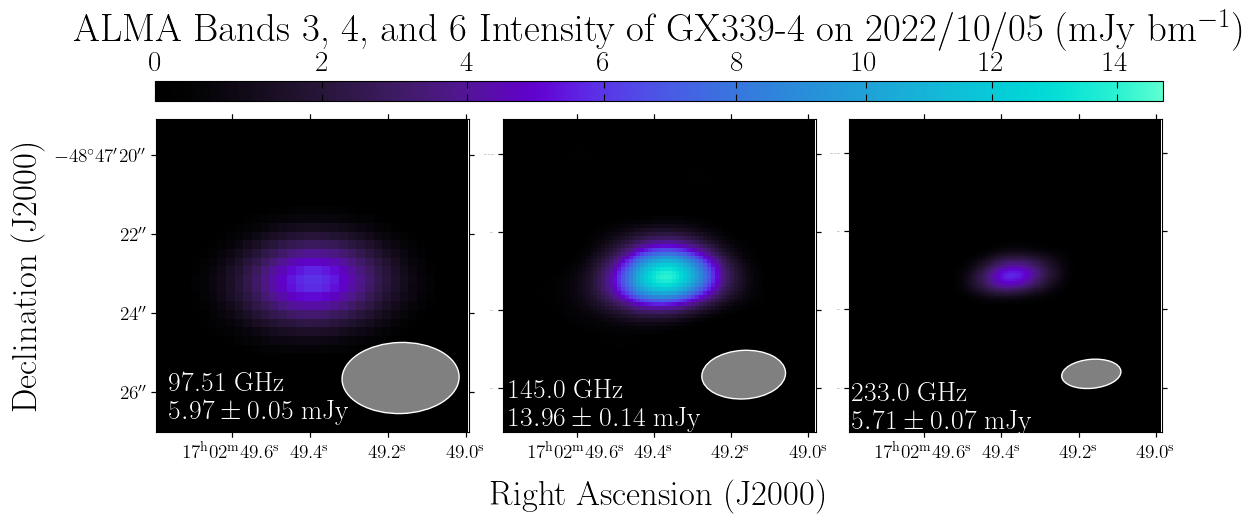

In [49]:
center = SkyCoord('17h02m49.39s', '-48:47:23.15deg', frame='icrs')
box_bkg = [8*u.arcsecond,8*u.arcsecond]
box_contour1 = [1.5*u.arcsecond,1.5*u.arcsecond]

def add_panel(fig, nrows, ncols, row, col, bkg_fname, flux_num):
    bkg_im  =  fits.open(bkg_fname)
    bkg_data = bkg_im[0].data[0][0]*1e3
    bkg_wcs = WCS(bkg_im[0].header, naxis=2)
    bkg_cut = Cutout2D(bkg_data,center, box_bkg, wcs=bkg_wcs)
    all_fluxes=['$5.97\pm 0.05$', '$13.96\pm 0.14$', '$5.71\pm 0.07$']
        
    ax = plt.subplot2grid([nrows, ncols], [row, col], fig=fig, projection=bkg_cut.wcs)
    
    cmap = cms.cosmic
    cmap.set_bad('black')
    cmap_norm = colors.PowerNorm(0.9, vmin=0, vmax=14.75)
    
    ax_bkimg = ax.imshow(bkg_cut.data,
                         cmap = cmap,
                         norm = cmap_norm,
                         aspect = 'equal',
                         origin = 'lower', 
                         interpolation = 'none',
                         rasterized = True, transform=ax.get_transform(bkg_cut.wcs))
        
    meerkat_beam = EllipseSkyRegion(center.spherical_offsets_by(-2.2*u.arcsec,-2.5*u.arcsec),
                                    bkg_im[0].header['BMIN']*u.deg,bkg_im[0].header['BMAJ']*u.deg,(bkg_im[0].header['BPA'])*u.deg)
    meerkat_beam_pix_reg = meerkat_beam.to_pixel(bkg_cut.wcs)
    meerkat_beam_pix_reg.visual['color'] = 'w'
    meerkat_beam_pix_reg.visual['facecolor'] = '0.5'
    meerkat_beam_pix_reg.visual['fill'] = True
    meerkat_beam_pix_reg.visual['linewidth'] = 1.0
    meerkat_beam_pix_reg.plot(ax=ax)
    if row == 0 and col == 0:
        ax.set_ylabel(r"Declination (J2000)", size=25,labelpad=0.8)
    else:
        ax.set_ylabel(r" ", size=22)

    if row == 0 and col == 1:
        ax.set_xlabel(r"Right Ascension (J2000)", size=25,ha='center')
    else:
        ax.set_xlabel(r" ", size=6)
    axra = ax.coords[0]
    axdec = ax.coords[1]
    if row != 0:
        axra.set_ticklabel(size=0)
    if col != 0:
        axdec.set_ticklabel(size=0)
    if row == 0:
        axra.set_ticklabel(size=14, horizontalalignment='left')
    if col == 0:
        axdec.set_ticklabel(size=14, horizontalalignment='left')
    ax.text(1, 1, str(round_sig(bkg_im[0].header['CRVAL3']/1000000000,4))+' GHz'+'\n'+str(all_fluxes[flux_num])+' mJy',fontsize=20,color='w')

    
    return fig, ax_bkimg
    
img_list = ['2022.1.01182.T/nice_images/X8b6f_no_self_cal.pbcor.fits', '2022.1.01182.T/nice_images/X8ce1_no_self_cal.pbcor.fits', '2022.1.01182.T/nice_images/X8e73_no_self_cal.pbcor.fits']
fig = plt.figure(figsize=(13,13))
label_fsize = 26

for meer_n, meer_img in enumerate(img_list):
    _, ax_bkimg = add_panel(fig,3,3,int(meer_n/3),meer_n%3,meer_img,meer_n);
    
cbar = fig.colorbar(ax_bkimg, ax=fig.axes, orientation='horizontal', anchor=(0,13),aspect=50)
cbar.ax.set_title('ALMA Bands 3, 4, and 6 Intensity of GX339-4 on 2022/10/05 (mJy bm$^{-1}$)',fontsize=28,ha='center')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(direction='in',length=5,bottom=True,top=True)
cbar.ax.xaxis.set_tick_params(labelsize=21)

fig.subplots_adjust(hspace=0.1,wspace=0.1)
plt.savefig(fname='GX339_tiles_whole_band_20221005.pdf', bbox_inches='tight')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


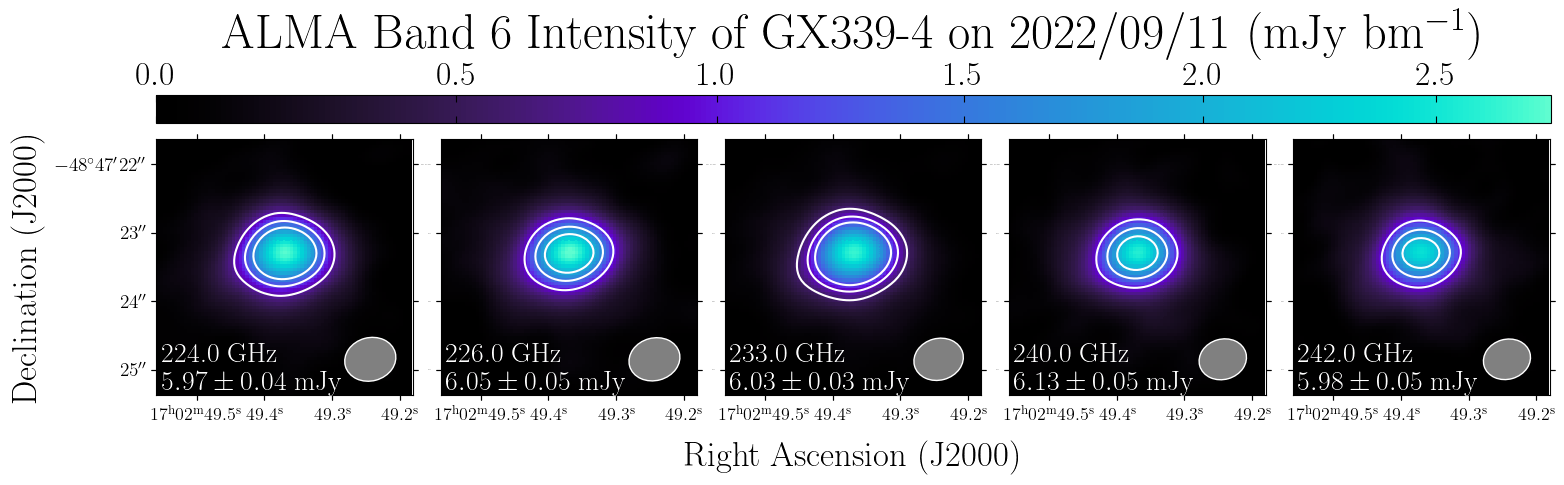

In [30]:
def add_panel(fig, nrows, ncols, row, col, bkg_fname, flux_num):
    bkg_im  =  fits.open(bkg_fname)
    bkg_data = bkg_im[0].data[0][0]*1e3
    bkg_wcs = WCS(bkg_im[0].header, naxis=2)
    bkg_cut = Cutout2D(bkg_data,center, box_bkg, wcs=bkg_wcs)
    #peak_fluxes=['$2.508\pm 0.043$','$2.521\pm 0.045$','$2.416\pm 0.030$','$2.330\pm 0.049$','$2.202\pm 0.051$']
    int_fluxes=['$5.97\pm 0.04$','$6.05\pm 0.05$','$6.03\pm 0.03$','$6.13\pm 0.05$','$5.98\pm 0.05$']
    mjy_rmss=[0.04,0.05,0.03,0.05,0.05]
      
        
    ax = plt.subplot2grid([nrows, ncols], [row, col], fig=fig, projection=bkg_cut.wcs)
    
    cmap = cms.cosmic
    cmap.set_bad('black')
    cmap_norm = colors.PowerNorm(0.9, vmin=0, vmax=2.75)
    
    ax_bkimg = ax.imshow(bkg_cut.data,
                         cmap = cmap,
                         norm = cmap_norm,
                         aspect = 'equal',
                         origin = 'lower', 
                         interpolation = 'none',
                         rasterized = True, transform=ax.get_transform(bkg_cut.wcs))
        
    meerkat_beam = EllipseSkyRegion(center.spherical_offsets_by(-1.25*u.arcsec,-1.35*u.arcsec),
                                    bkg_im[0].header['BMIN']*u.deg,bkg_im[0].header['BMAJ']*u.deg,(bkg_im[0].header['BPA'])*u.deg)
    meerkat_beam_pix_reg = meerkat_beam.to_pixel(bkg_cut.wcs)
    meerkat_beam_pix_reg.visual['color'] = 'w'
    meerkat_beam_pix_reg.visual['facecolor'] = '0.5'
    meerkat_beam_pix_reg.visual['fill'] = True
    meerkat_beam_pix_reg.visual['linewidth'] = 1.0
    meerkat_beam_pix_reg.plot(ax=ax)
    if row == 0 and col == 0:
        ax.set_ylabel(r"Declination (J2000)", size=25,labelpad=0.8)
    else:
        ax.set_ylabel(r" ", size=60)

    if row == 0 and col == 2:
        ax.set_xlabel(r"Right Ascension (J2000)", size=25,ha='center')
    else:
        ax.set_xlabel(r" ", size=6)
    axra = ax.coords[0]
    axdec = ax.coords[1]
    if row != 0:
        axra.set_ticklabel(size=0)
    if col != 0:
        axdec.set_ticklabel(size=0)
    if row == 0:
        axra.set_ticklabel(size=13, horizontalalignment='left')
    if col == 0:
        axdec.set_ticklabel(size=14, horizontalalignment='left')
    #ax.text(1, 1, str(round_sig(bkg_im[0].header['CRVAL3']/1000000000,4))+' GHz'+'\n'+str(peak_fluxes[flux_num])+' mJy/b$m^{-1}',fontsize=17,color='w')
    ax.text(1, 1, str(round_sig(bkg_im[0].header['CRVAL3']/1000000000,4))+' GHz'+'\n'+str(int_fluxes[flux_num])+' mJy',fontsize=20,color='w')
    ax.contour(bkg_cut.data,bkg_cut.data, transform=ax.get_transform(bkg_cut.wcs), colors='w', levels=mjy_rmss[flux_num]*np.array([20,30,40]), zorder=10)
    
    return fig, ax_bkimg
    

img_list = ['2021.1.01208/X8c46_no_self_cal_spw0.pbcor.fits','2021.1.01208/X8c46_no_self_cal_spw1.pbcor.fits','2021.1.01208/X8c46_no_self_cal.pbcor.fits','2021.1.01208/X8c46_no_self_cal_spw2.pbcor.fits','2021.1.01208/X8c46_no_self_cal_spw3.pbcor.fits']
fig = plt.figure(figsize=(18,18))
label_fsize = 26


center = SkyCoord('17h02m49.3697227515s', '-48:47:23.5deg', frame='icrs')
box_bkg = [3.75*u.arcsecond,3.75*u.arcsecond]
box_contour1 = [1.5*u.arcsecond,1.5*u.arcsecond]

for meer_n, meer_img in enumerate(img_list):
    _, ax_bkimg = add_panel(fig,5,5,int(meer_n/5),meer_n%5,meer_img,meer_n);
    
    
cbar = fig.colorbar(ax_bkimg, ax=fig.axes, orientation='horizontal', anchor=(0,32),aspect=50)
cbar.ax.set_title('ALMA Band 6 Intensity of GX339-4 on 2022/09/11 (mJy bm$^{-1}$)',fontsize=35,ha='center')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(direction='in',length=5,bottom=True,top=True)
cbar.ax.xaxis.set_tick_params(labelsize=24)

fig.subplots_adjust(hspace=0.1,wspace=0.1)
plt.savefig(fname='GX339_tiles_full_contours_20220911.pdf', bbox_inches='tight')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


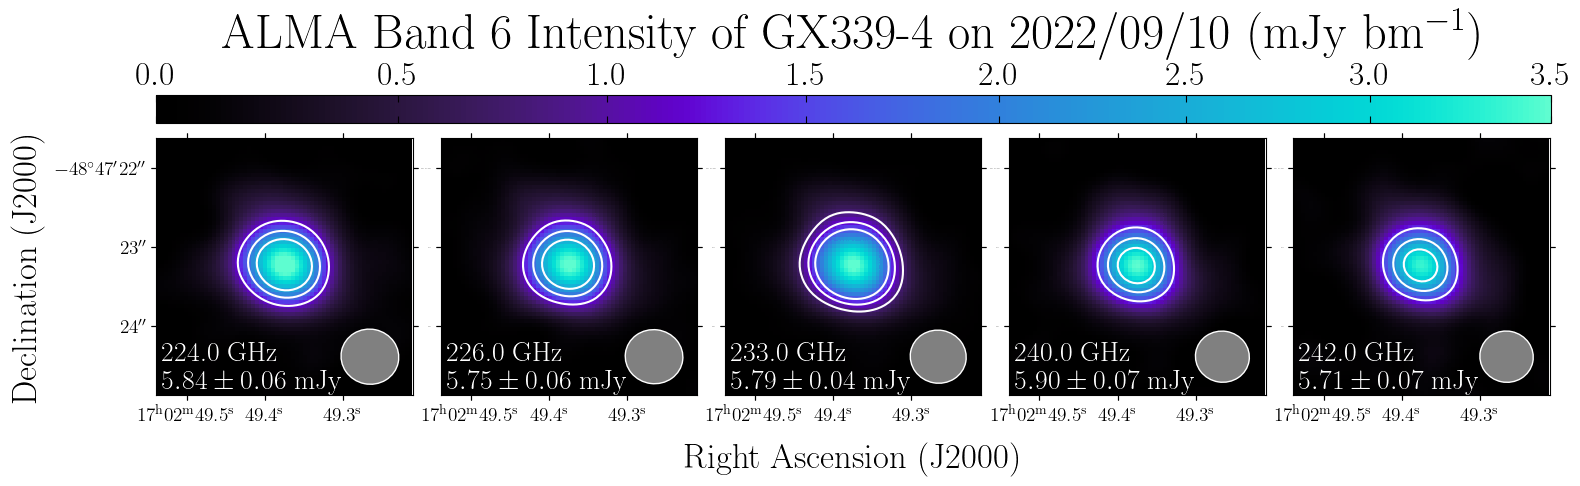

In [29]:
def add_panel(fig, nrows, ncols, row, col, bkg_fname, flux_num):
    bkg_im  =  fits.open(bkg_fname)
    bkg_data = bkg_im[0].data[0][0]*1e3
    bkg_wcs = WCS(bkg_im[0].header, naxis=2)
    bkg_cut = Cutout2D(bkg_data,center, box_bkg, wcs=bkg_wcs)
    #peak_fluxes=['$3.499\pm 0.058$','$3.360\pm 0.056$','$3.356\pm 0.037$','$3.303\pm 0.067$','$3.175\pm 0.069$']
    int_fluxes=['$5.84\pm 0.06$','$5.75\pm 0.06$','$5.79\pm 0.04$','$5.90\pm 0.07$','$5.71\pm 0.07$']
    mjy_rmss=[0.06,0.06,0.04,0.07,0.07]
        
    ax = plt.subplot2grid([nrows, ncols], [row, col], fig=fig, projection=bkg_cut.wcs)
    
    cmap = cms.cosmic
    cmap.set_bad('black')
    cmap_norm = colors.PowerNorm(0.9, vmin=0, vmax=3.5)
    
    ax_bkimg = ax.imshow(bkg_cut.data,
                         cmap = cmap,
                         norm = cmap_norm,
                         aspect = 'equal',
                         origin = 'lower', 
                         interpolation = 'none',
                         rasterized = True, transform=ax.get_transform(bkg_cut.wcs))
        
    meerkat_beam = EllipseSkyRegion(center.spherical_offsets_by(-1.1*u.arcsec,-1.15*u.arcsec),
                                    bkg_im[0].header['BMIN']*u.deg,bkg_im[0].header['BMAJ']*u.deg,(bkg_im[0].header['BPA'])*u.deg)
    meerkat_beam_pix_reg = meerkat_beam.to_pixel(bkg_cut.wcs)
    meerkat_beam_pix_reg.visual['color'] = 'w'
    meerkat_beam_pix_reg.visual['facecolor'] = '0.5'
    meerkat_beam_pix_reg.visual['fill'] = True
    meerkat_beam_pix_reg.visual['linewidth'] = 1.0
    meerkat_beam_pix_reg.plot(ax=ax)
    if row == 0 and col == 0:
        ax.set_ylabel(r"Declination (J2000)", size=25,labelpad=0.8)
    else:
        ax.set_ylabel(r" ", size=0)

    if row == 0 and col == 2:
        ax.set_xlabel(r"Right Ascension (J2000)", size=25,ha='center')
    else:
        ax.set_xlabel(r" ", size=0)
    axra = ax.coords[0]
    axdec = ax.coords[1]
    if row != 0:
        axra.set_ticklabel(size=0)
    if col != 0:
        axdec.set_ticklabel(size=0)
    if row == 0:
        axra.set_ticklabel(size=14, horizontalalignment='left')
    if col == 0:
        axdec.set_ticklabel(size=14, horizontalalignment='left')
    #ax.text(1, 1, str(round_sig(bkg_im[0].header['CRVAL3']/1000000000,4))+' GHz'+'\n'+str(peak_fluxes[flux_num])+' mJy/b$m^{-1}',fontsize=17,color='w')
    ax.text(1, 1, str(round_sig(bkg_im[0].header['CRVAL3']/1000000000,4))+' GHz'+'\n'+str(int_fluxes[flux_num])+' mJy',fontsize=20,color='w')
    ax.contour(bkg_cut.data,bkg_cut.data, transform=ax.get_transform(bkg_cut.wcs), colors='w', levels=mjy_rmss[flux_num]*np.array([20,30,40]), zorder=10)
    
    return fig, ax_bkimg
    

img_list = ['2021.1.01208/X5845_no_self_cal_spw0.pbcor.fits','2021.1.01208/X5845_no_self_cal_spw1.pbcor.fits','2021.1.01208/X5845_no_self_cal.pbcor.fits','2021.1.01208/X5845_no_self_cal_spw2.pbcor.fits','2021.1.01208/X5845_no_self_cal_spw3.pbcor.fits']
fig = plt.figure(figsize=(18,18))
label_fsize = 26


center = SkyCoord('17h02m49.3769658684s', '-48:47:23.2418420058deg', frame='icrs')
box_bkg = [3.25*u.arcsecond,3.25*u.arcsecond]
box_contour1 = [1.5*u.arcsecond,1.5*u.arcsecond]

for meer_n, meer_img in enumerate(img_list):
    _, ax_bkimg = add_panel(fig,5,5,int(meer_n/5),meer_n%5,meer_img,meer_n);
    
    
cbar = fig.colorbar(ax_bkimg, ax=fig.axes, orientation='horizontal', anchor=(0,32),aspect=50)
cbar.ax.set_title('ALMA Band 6 Intensity of GX339-4 on 2022/09/10 (mJy bm$^{-1}$)',fontsize=35,ha='center')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(direction='in',length=5,bottom=True,top=True)
cbar.ax.xaxis.set_tick_params(labelsize=24)

fig.subplots_adjust(hspace=0.1,wspace=0.1)
plt.savefig(fname='GX339_tiles_full_contours_20220910.pdf', bbox_inches='tight')